# Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


# Import the Dataset

In [2]:
df = pd.read_csv('card_transdata.csv')
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Shape of the dataset

In [3]:
df.shape

(123716, 8)

# Verifying duplicate in the dataset

In [4]:
duplicates = df[df.duplicated()]
duplicates.head(8)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


# Removing duplicates by considering only the first occurence

In [5]:
clean_data = df.drop_duplicates()
clean_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Shape of the dataset after removing duplicates

In [6]:
clean_data.shape

(123716, 8)

# check the data Types

In [7]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123716 entries, 0 to 123715
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              123716 non-null  float64
 1   distance_from_last_transaction  123715 non-null  float64
 2   ratio_to_median_purchase_price  123715 non-null  float64
 3   repeat_retailer                 123715 non-null  float64
 4   used_chip                       123715 non-null  float64
 5   used_pin_number                 123715 non-null  float64
 6   online_order                    123715 non-null  float64
 7   fraud                           123715 non-null  float64
dtypes: float64(8)
memory usage: 8.5 MB


# calculating umber of unique values in each column

In [8]:
clean_data.nunique()

distance_from_home                123716
distance_from_last_transaction    123715
ratio_to_median_purchase_price    123715
repeat_retailer                        2
used_chip                              2
used_pin_number                        2
online_order                           2
fraud                                  2
dtype: int64

# Examine the dataset statical properties, summarizing individual columns with metrics like minimum, maximum, and mean values

In [9]:
clean_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,123716.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000
mean,26.724592,5.008236,1.821063,0.881664,0.350386,0.102696,0.651611,0.087265
std,64.956175,24.124722,2.883276,0.323007,0.477093,0.303562,0.476462,0.282224
min,0.021322,0.000488,0.010434,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.853372,0.294025,0.476058,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.965470,0.996398,0.996665,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.782590,3.333958,2.091639,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


# Identifying missing values

In [10]:
clean_data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    1
ratio_to_median_purchase_price    1
repeat_retailer                   1
used_chip                         1
used_pin_number                   1
online_order                      1
fraud                             1
dtype: int64

In [11]:
clean_data = clean_data.fillna(clean_data.mean())


# creating a Correlation matrix for the numerical attributes.

<function matplotlib.pyplot.show(close=None, block=None)>

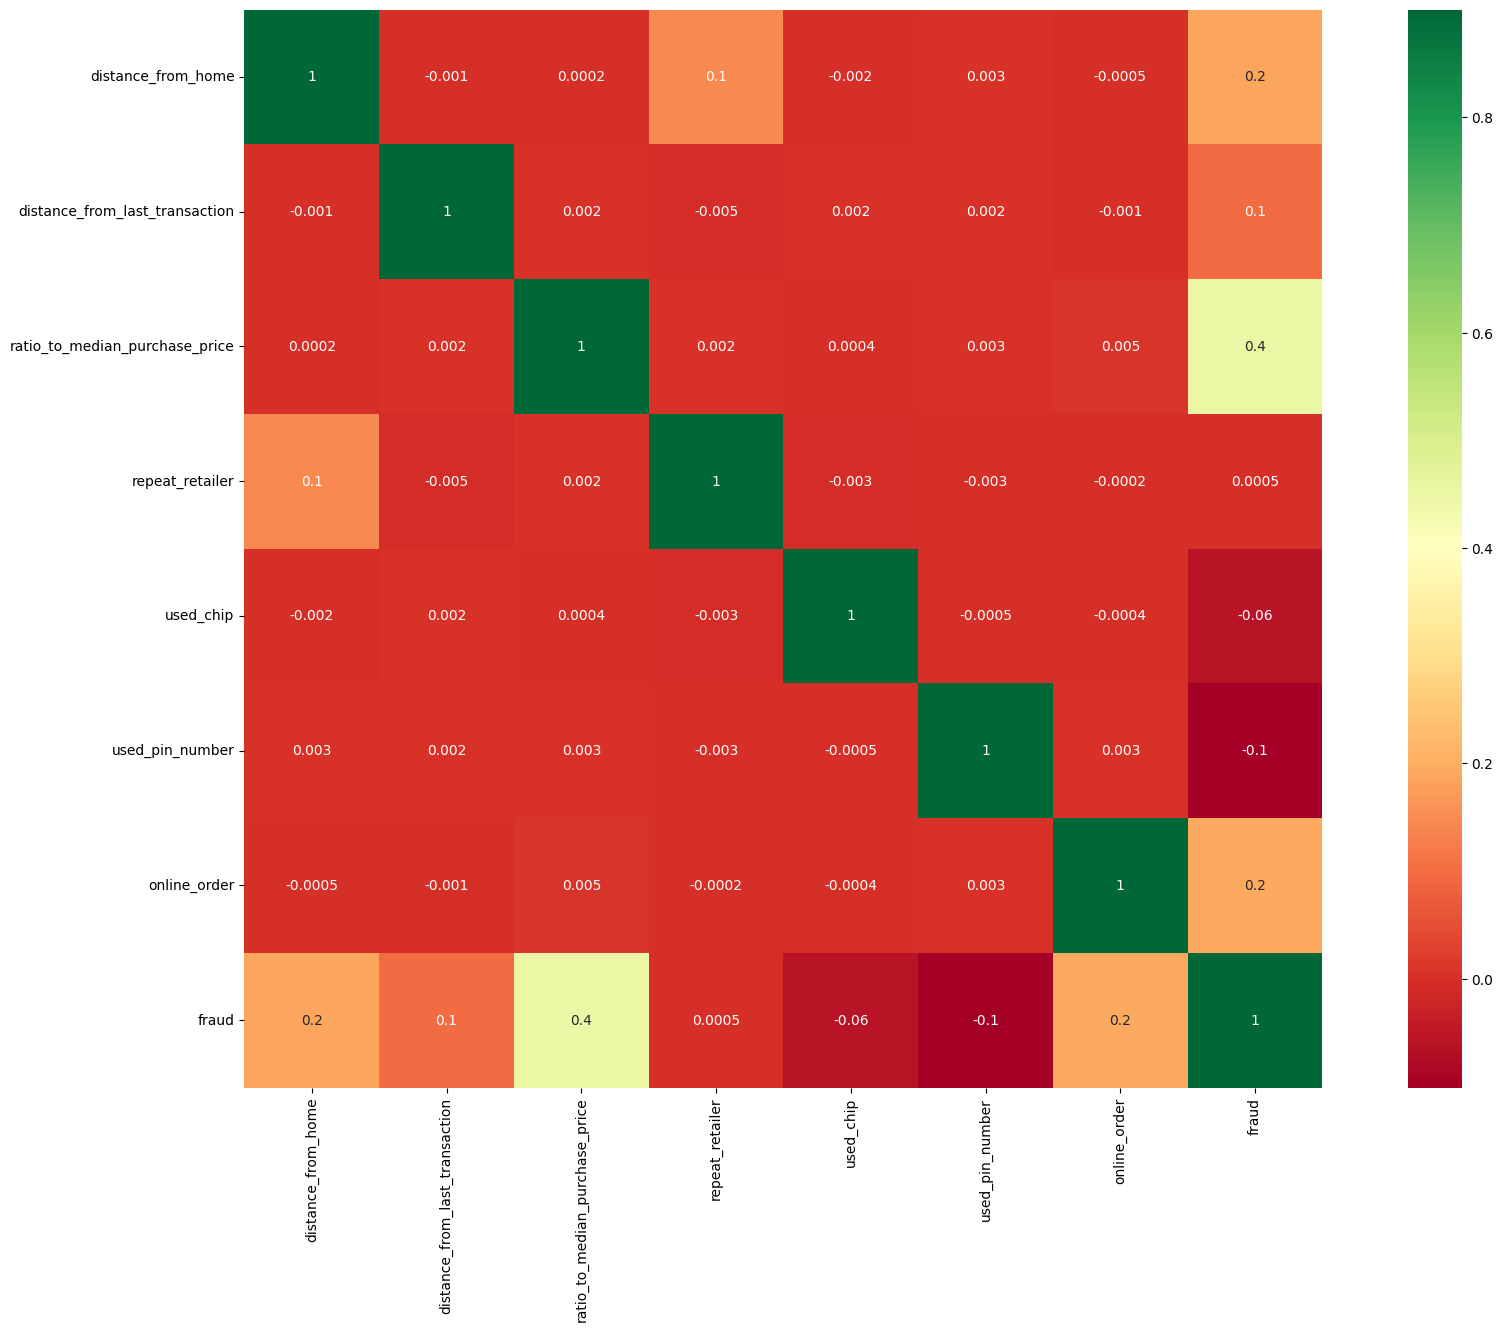

In [12]:
corrmat = clean_data.corr()
plt.subplots(figsize=(22,14))
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True,cmap='RdYlGn',fmt='.0g')
plt.show

# Analyzing the Fraud Feature.

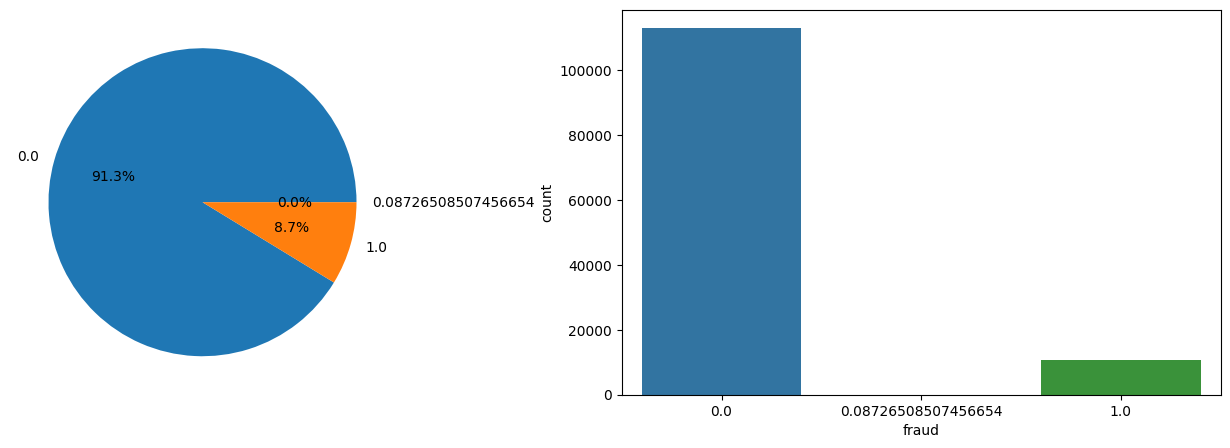

In [13]:
f, ax = plt.subplots(1,2, figsize=(17,5))
clean_data.fraud.value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0],label="")
sns.countplot(data=clean_data, x='fraud')
plt.show()


In [14]:
# @title pair plot


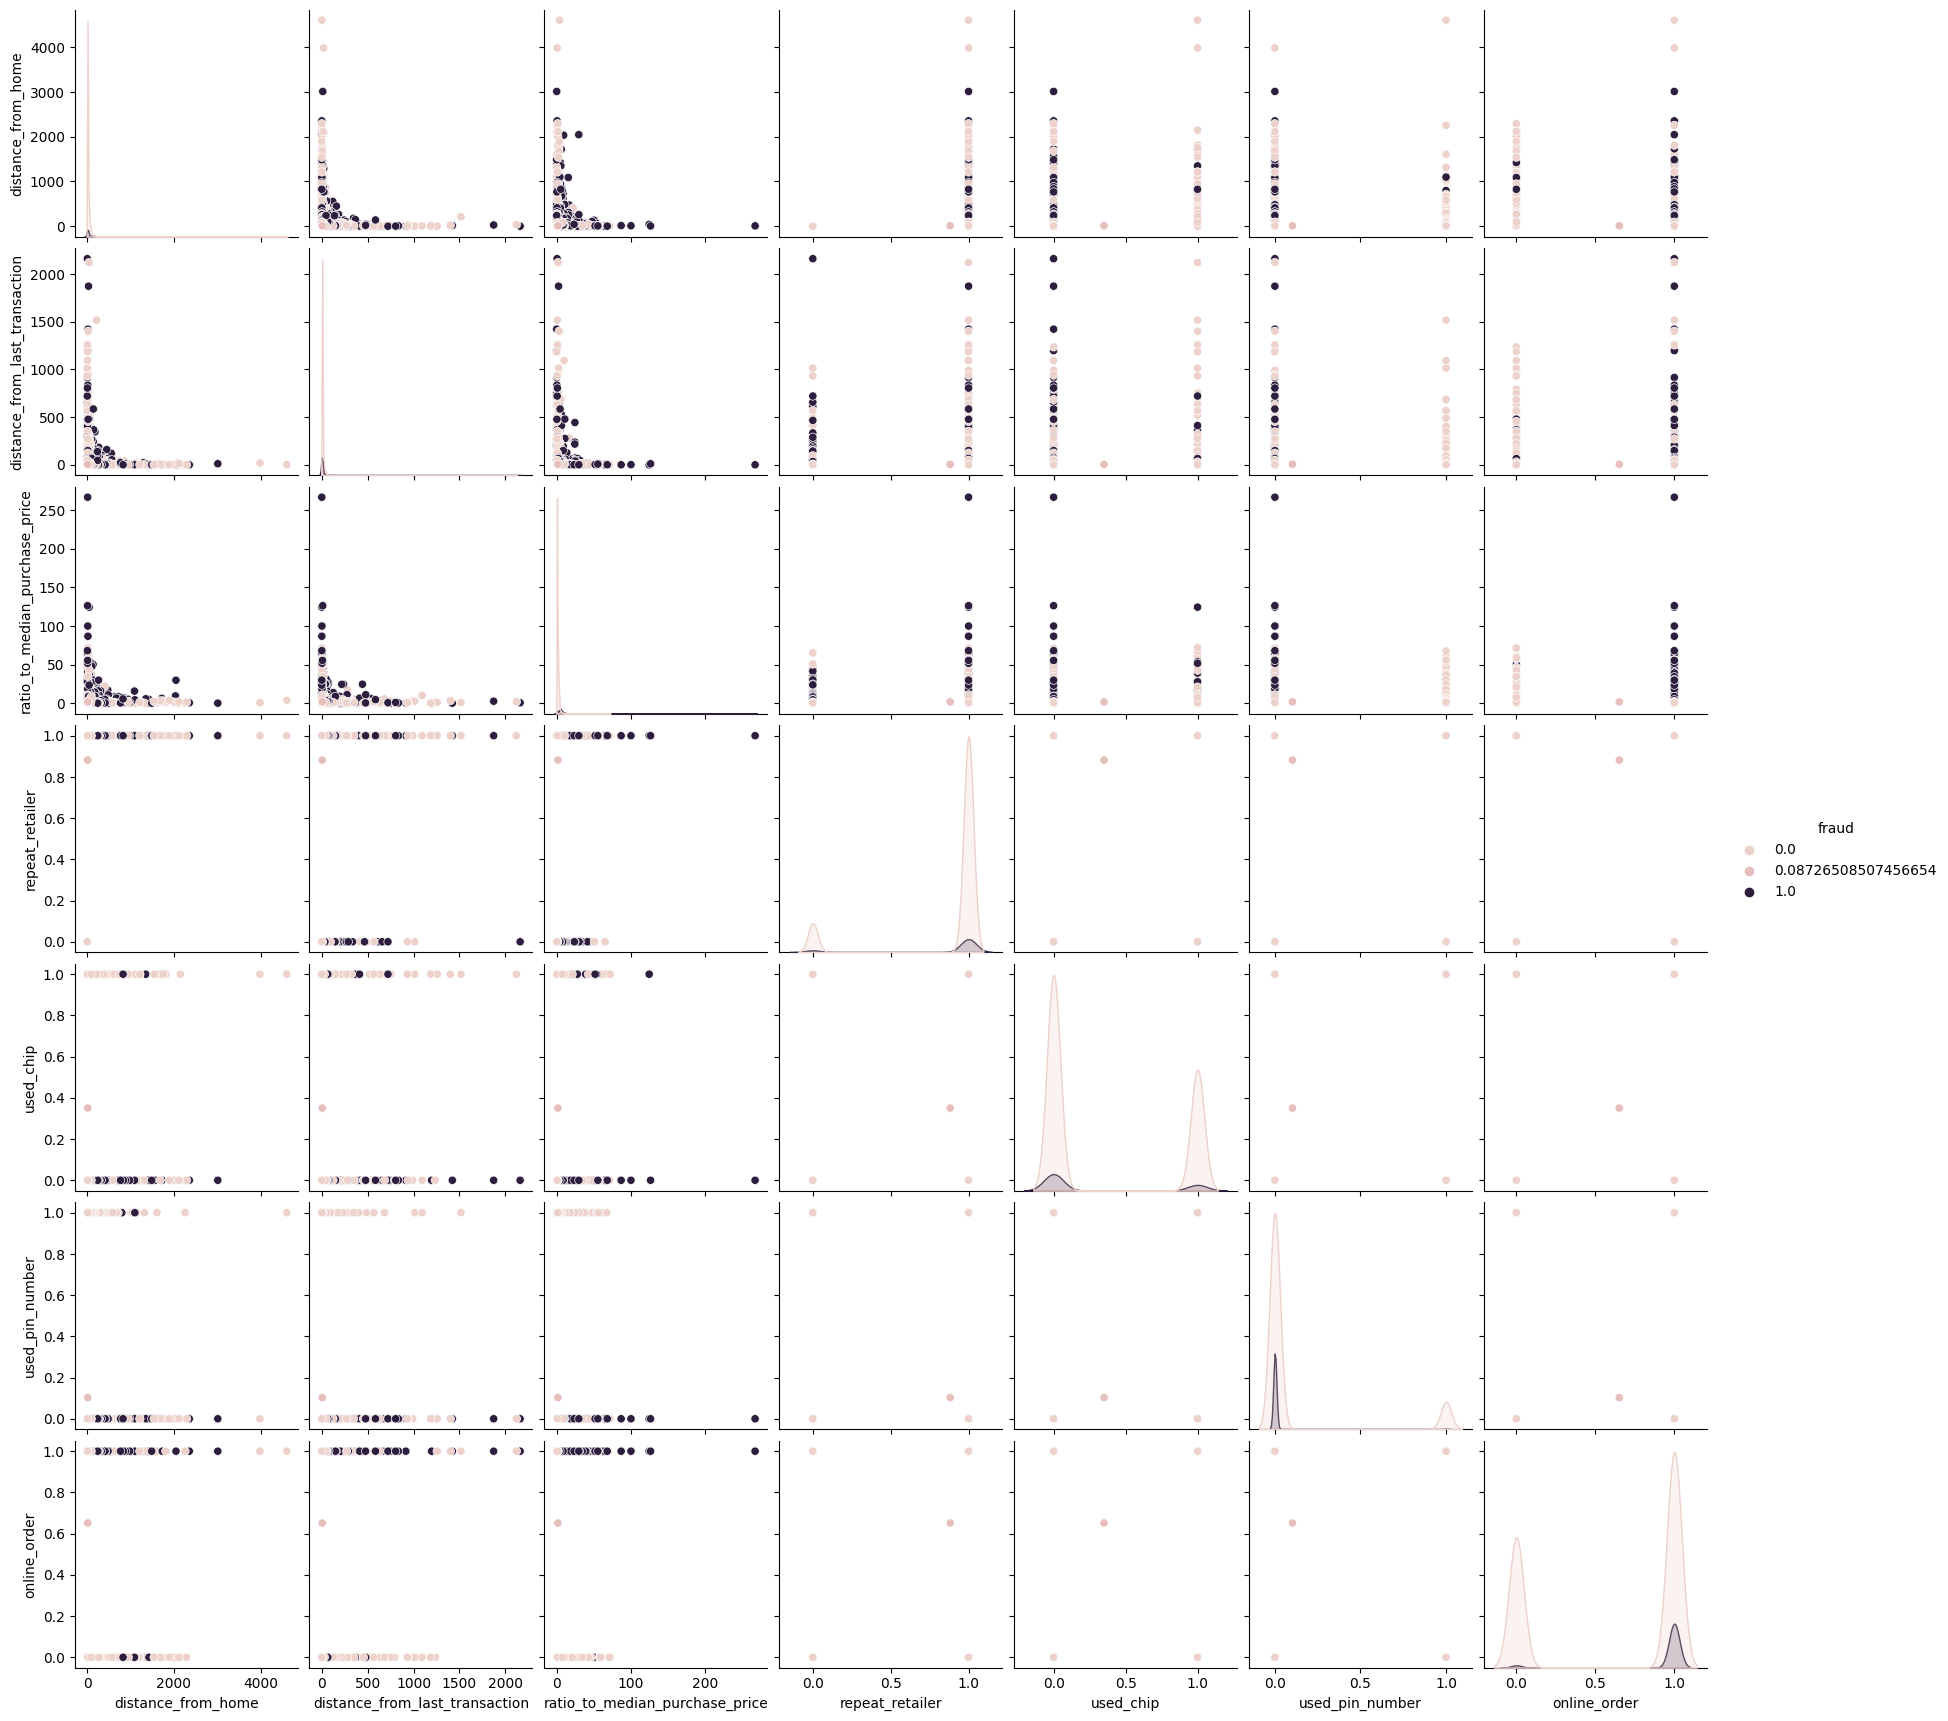

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(clean_data, hue='fraud', diag_kind='kde')
plt.show()


In [16]:
# @title Box plot


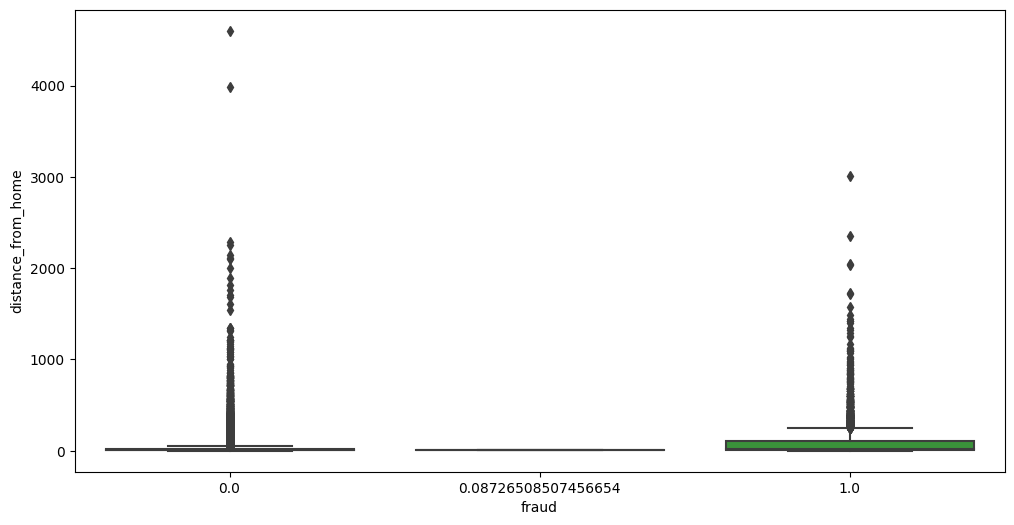

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='fraud', y='distance_from_home', data=clean_data)
plt.show()


# Dividing x and y

In [18]:
X = clean_data.drop(columns=["fraud"])
y = clean_data["fraud"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [19]:
threshold = 0.5
y_binary = [1 if value >= threshold else 0 for value in y]


# Over sampling minority class using SMOTE

1.generate synthetic examples using k nearest neighbors algorithm

2.SMOTE: synthetic Minority Over-sampling Technique

In [20]:
# pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')

In [21]:
X_sm, y_sm = smote.fit_resample(X_standardized,y_binary )

y_sm_series = pd.Series(y_sm)


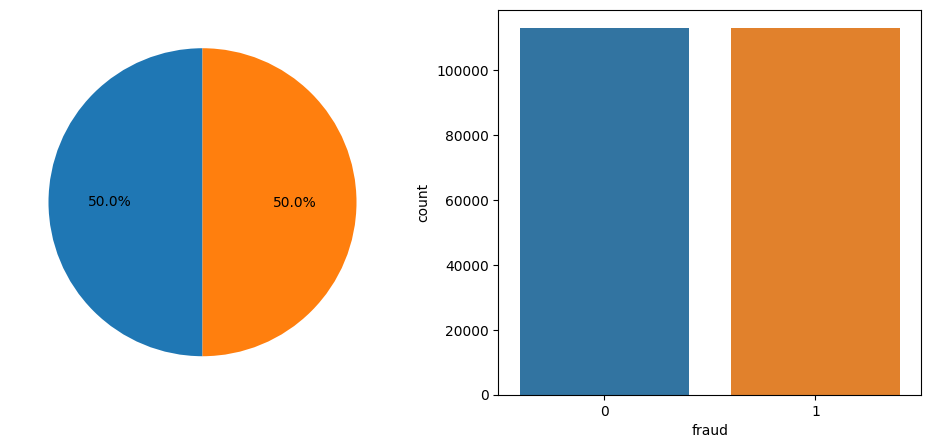

In [22]:
f, ax = plt.subplots(1,2, figsize=(12,5))

y_sm_series.value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], labels=None, startangle=90)
sns.countplot(data=pd.DataFrame({'fraud': y_sm}), x='fraud', ax=ax[1])
plt.show()

# scalling


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_sm)

# Dividing data in to training, and testing sets.

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_sm,test_size=0.3,random_state=15, stratify=y_sm)

In [25]:
y_train = np.array(y_train)


In [26]:
print("Train set size :" , X_train.shape)
print("Test set size :" , X_test.shape)


Train set size : (158088, 7)
Test set size : (67752, 7)


# Import the necessary libraries for the models

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB




#

# Create a function for evaluation that provides all relevant metrics after training a machine learning model.

#

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

#

# Models Training

#

In [29]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [30]:


model_list=[]
best_model = None
best_accuracy = 0.0

def tune_parameters(model_name, model, param_grid, X_train, y_train):
    print(f"Tuning parameters for {model_name}...")

    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    best_model = grid_search.best_estimator_

    return best_model


def evaluate_and_display(model,model_name,X_train,y_train,X_test,y_test):
    global best_accuracy, best_model
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    confusion_test = confusion_matrix(y_test, y_test_pred)
    confusion_train = confusion_matrix(y_train, y_train_pred)

    print(type(model).__name__)
    model_list.append(type(model).__name__)

    print("Accuracy train score: {:.4f}".format(accuracy_train))

    print('----------------------------------')

    print("Accuracy test score: {:.4f}".format(accuracy_test))

    print('----------------------------------')

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('----------------------------------')

    print("Plot the confusion matrix for training")
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_train, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Training")
    plt.show()

    print('----------------------------------')

    print("Plot the confusion matrix for testing")
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_test, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Testing")
    plt.show()

    print('='*35)
    print('\n')

    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = model_name




Tuning parameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 10}
LogisticRegression
Accuracy train score: 0.9448
----------------------------------
Accuracy test score: 0.9435
----------------------------------
Model performance for Training set
- Root Mean Squared Error: 0.2349
- Mean Absolute Error: 0.0552
- R2 Score: 0.7794
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2378
- Mean Absolute Error: 0.0565
- R2 Score: 0.7739
----------------------------------
Plot the confusion matrix for training


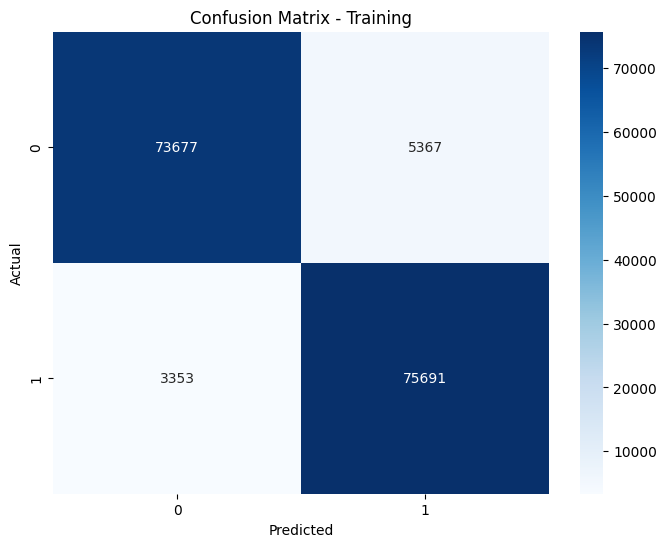

----------------------------------
Plot the confusion matrix for testing


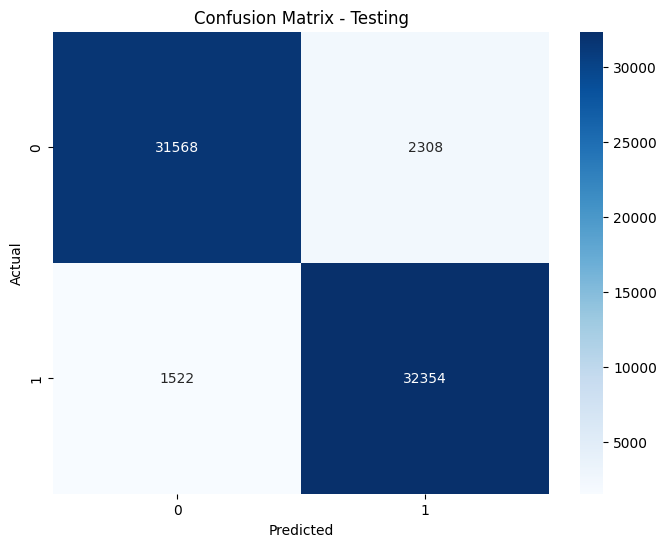



Tuning parameters for Support Vector Machine...


In [ ]:
param_grids = {
    "Logistic Regression": {"C": [0.001, 0.01, 0.1, 1, 10, 100]},
    "Support Vector Machine": {"C": [0.001, 0.01, 0.1, 1, 10, 100], "kernel": ['linear', 'rbf']},
    "DecisionTreeClassifier": {"max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10]},
    "RandomForestClassifier": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10]},
    "KNeighborsClassifier": {"n_neighbors": [3, 5, 7, 9]}
}

for model_name, model in models.items():
    best_model = tune_parameters(model_name, model, param_grids[model_name], X_train, y_train)
    evaluate_and_display(best_model, model_name, X_train, y_train, X_test, y_test)

In [ ]:
print(f"The best model is ; {best_model} with test accuracy{best_accuracy:.4f}")

# Model Training on ANN neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(7, input_shape=(7,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])


In [ ]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train, epochs=5)

In [ ]:
y_pred_ANN = model.predict(X_test)

In [ ]:
y_pred_ANN = (y_pred_ANN > 0.5)

In [ ]:
report = classification_report(y_test, y_pred_ANN)
print(report)


In [ ]:
cm_ANN = confusion_matrix(y_test, y_pred_ANN)

In [ ]:
print(cm_ANN)

In [ ]:
print("Plot the confusion matrix for testing")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ANN, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Testing")
plt.show()